In [2]:
# Environ
import scipy as scp
import tensorflow as tf
from scipy.stats import gamma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import random
import multiprocessing as mp
import psutil
import pickle
import os
import re

# Own
import ddm_data_simulation as ds
import cddm_data_simulation as cds
import kde_training_utilities as kde_util
import kde_class as kde
import boundary_functions as bf

In [7]:
# FULL DDM  
repeats = 50
my_means = np.zeros(repeats)
for i in range(repeats):
    out = cds.full_ddm(v = 0, 
                       a = 0.96,
                       w = 0.5,
                       ndt = 0.5,
                       dw = 0.0,
                       sdv = 0.0,
                       dndt = 0.5,
                       delta_t = 0.01, 
                       max_t = 20,
                       n_samples = 10000,
                       boundary_fun = bf.constant,
                       boundary_multiplicative = True, 
                       boundary_params = {})
    print(i)
    
    my_means[i] = np.mean(out[0][out[1] == 1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


(array([ 3.06265352,  3.06265352,  9.18796057, 12.25061409, 42.87714932,
        15.31326762, 30.62653523, 24.50122819,  6.12530705,  6.12530705]),
 array([1.4850775 , 1.49160779, 1.49813807, 1.50466835, 1.51119864,
        1.51772892, 1.52425921, 1.53078949, 1.53731978, 1.54385006,
        1.55038035]),
 <a list of 10 Patch objects>)

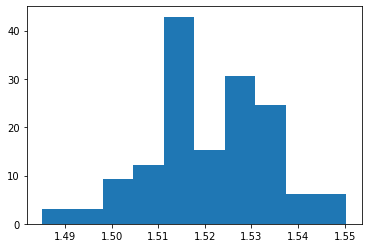

In [8]:
plt.hist(my_means, density = True)

In [ ]:
np.mean(out[0][out[1] == 1])

In [ ]:
plt.hist(out[0] * out[1], bins = 50)

In [ ]:
int(50 / out[2]['delta_t'] + 1)

In [11]:
# LCA 
repeats = 1
my_means = np.zeros(repeats)
for i in range(repeats):
    out = cds.lca(v = np.array([0, 0], dtype = np.float32), 
                  a = 2, 
                  w = np.array([0.5, 0.5], dtype = np.float32), 
                  ndt = np.array([1.0, 1.0], dtype = np.float32),
                  g = -1.0,
                  b = 1.0,
                  delta_t = 0.01, 
                  max_t = 40,
                  n_samples = 10000,
                  boundary_fun = bf.constant,
                  boundary_multiplicative = True, 
                  boundary_params = {})
    print(i)
    my_means[i] = np.mean(out[0][out[1] == 1])

0


(array([1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 6.000e+00, 4.000e+00, 1.300e+01, 1.000e+01,
        2.600e+01, 4.300e+01, 4.100e+01, 7.500e+01, 9.900e+01, 1.700e+02,
        2.500e+02, 3.810e+02, 6.540e+02, 1.201e+03, 1.669e+03, 3.510e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.065e+03, 1.616e+03, 9.070e+02, 4.810e+02, 3.100e+02, 2.050e+02,
        1.220e+02, 1.060e+02, 5.700e+01, 4.100e+01, 3.200e+01, 1.600e+01,
        8.000e+00, 1.000e+01, 6.000e+00, 6.000e+00, 5.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00]),
 array([-8.53007698, -8.21187442, -7.89367186, -7.57546929, -7.25726673,
        -6.93906417, -6.62086161, -6.30265904, -5.98445648, -5.66625392,
        -5.34805136, -5.02984879, -4.71164623, -4.39344367, -4.07524111,
        -3.75703855, -3.43883598, -3.12063342, -2.80243086, -2.4842283 ,
        -2.16602573, -1.84782317, -1.52962061, -1.21141805, -0.89321548,
        -0.

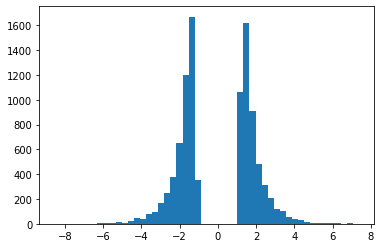

In [12]:
out[1][out[1] == 0] = -1
plt.hist(out[0] * out[1], bins = 50)

In [40]:
# LCA 
repeats = 10
my_means = np.zeros(repeats)
for i in range(repeats):
    out = cds.ddm_flexbound(v = 0.0, 
                            a = 1.5, 
                            w = 0.5, 
                            ndt = 0.1,
                            delta_t = 0.01, 
                            max_t = 40,
                            n_samples = 10000,
                            boundary_fun = bf.constant,
                            boundary_multiplicative = True, 
                            boundary_params = {})
    print(i)
    my_means[i] = np.mean(out[0][out[1] == 1])

0
1
2
3
4
5
6
7
8
9


(array([13.26211812, 26.52423623,  0.        , 26.52423623,  0.        ,
         0.        , 13.26211812, 26.52423623, 13.26211812, 13.26211812]),
 array([2.47097778, 2.47851806, 2.48605833, 2.4935986 , 2.50113888,
        2.50867915, 2.51621943, 2.5237597 , 2.53129997, 2.53884025,
        2.54638052]),
 <a list of 10 Patch objects>)

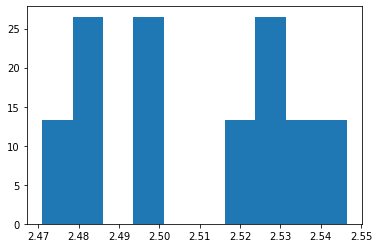

In [41]:
plt.hist(my_means, density = True)

In [ ]:
out[1][out[1] == -1].shape

In [ ]:
int((40 / 0.01) + 1)

In [ ]:
my_bound = bf.constant

In [ ]:
my_bound

In [ ]:
my_bound(t = 100)

In [ ]:
h_Test = (1, 1, 1)

In [ ]:
h_Test + (1,2)

In [ ]:
h = ({'c': 1}, {'c2': 2})

In [ ]:
h_Test + h

In [ ]:
a = ({'c': 1},)

In [ ]:
h_Test + a

In [ ]:
def foo(name, *args, **kwargs):
    print ("args: ", args)
    print ("Type of args: ", type(args))
    if len(args)>2:
        args = args[0], args[1]     #- Created Same name variable.
    print ("Temp args:", args)

In [ ]:
foo('hello', ('a', 'b', 'c'))

In [ ]:
t = ('a', 'b', 'c')

In [ ]:
t[0]

In [ ]:
t2 = t[0], t[1]

In [ ]:
t2

In [ ]:
a = ['a']
a = a + ['b', 'c']

In [ ]:
a

In [ ]:
test_dat = pd.DataFrame(np.zeros((10, 5)), columns = ['v_0', 'v_1', 'a', 'b', 'c'])

In [ ]:
test_dat

In [ ]:
np.array(test_dat.loc[1, ['v_0', 'v_1']])

In [ ]:
my_keys = []
for key in test_dat.keys():
    if key[0] == 'v':
        my_keys.append(key)
np.array(test_dat.loc[1, ['v_0', 'v_1']])

In [2]:
my_target_folder = '/media/data_cifs/afengler/tmp/'

In [3]:
import make_data_lba as mdlba

In [4]:
my_dat = mdlba.make_data_rt_choice(target_folder = my_target_folder)

0  parameters sampled
1  parameters sampled
2  parameters sampled
3  parameters sampled
4  parameters sampled
5  parameters sampled
6  parameters sampled
7  parameters sampled
8  parameters sampled
9  parameters sampled
10  parameters sampled
11  parameters sampled
12  parameters sampled
13  parameters sampled
14  parameters sampled
15  parameters sampled
16  parameters sampled
17  parameters sampled
18  parameters sampled
19  parameters sampled
label 0 generated
label 1000 generated
label 2000 generated
label 3000 generated
label 4000 generated
label 5000 generated
label 6000 generated
label 7000 generated
label 8000 generated
label 9000 generated
label 10000 generated
label 11000 generated
label 12000 generated
label 13000 generated
label 14000 generated
label 15000 generated
label 16000 generated
label 17000 generated
label 18000 generated
label 19000 generated


In [ ]:
a = [1,2,3,4,5]

In [ ]:
a[:-2]

In [ ]:
np.isclose(0, 1e-15)

In [ ]:
1.0 - 1e-29 == 1.0

In [ ]:
np.max(my_dat['log_likelihood'])

In [46]:
data = np.concatenate([out[0], out[1]], axis = 1)

In [57]:
data[data[:,0] < 3, 0]

array([2.20999837, 2.24999833, 1.15999937, ..., 0.93999952, 1.45999908,
       0.98999947])

In [60]:
np.log(1e-100)

-230.25850929940458